In [377]:
import gala.potential as gp
import astropy.units as u
import numpy as np
import gala.dynamics as gd
from gala.units import galactic
import matplotlib.pyplot as plt

In [378]:
total_potential = gp.CCompositePotential()
total_potential['disk'] = gp.MiyamotoNagaiPotential(m = 1E11 , a=3, b=0.15, units=galactic)
total_potential['bulge'] = gp.HernquistPotential(m = 3E9 , c = 0.67, units=galactic)
total_potential['dm_halo'] = gp.NFWPotential.from_circular_velocity(v_c=200*u.km/u.s,
                                             r_s=10.*u.kpc,
                                             units=galactic)
#total_potential['nucleus'] = gp.KeplerPotential(m=)

In [379]:
test_star_p = [18,0,0]
test_star_v = [20,175,50]

In [380]:
ics = gd.PhaseSpacePosition(pos = test_star_p*u.kpc, 
                            vel = test_star_v*u.km/u.s)
#orbital matematical derivation
orbit = gp.Hamiltonian(total_potential).integrate_orbit(ics,dt=2.,n_steps=5000)

#some random initial conditions sampling a gaussion over the orbit 
#100 pc en x, y, z and 1 km/s in velocity variation
n_orbits = 3500
new_pos = np.random.normal(ics.pos.xyz.to(u.pc).value, 100,
                           size=(n_orbits,3)).T*u.pc
new_vel = np.random.normal(ics.vel.d_xyz.to(u.km/u.s).value, 1.,
                           size=(n_orbits,3)).T * u.km/u.s
new_ics = gd.PhaseSpacePosition(pos=new_pos, vel=new_vel)
orbits = gp.Hamiltonian(total_potential).integrate_orbit(new_ics, dt=2., n_steps=5000)

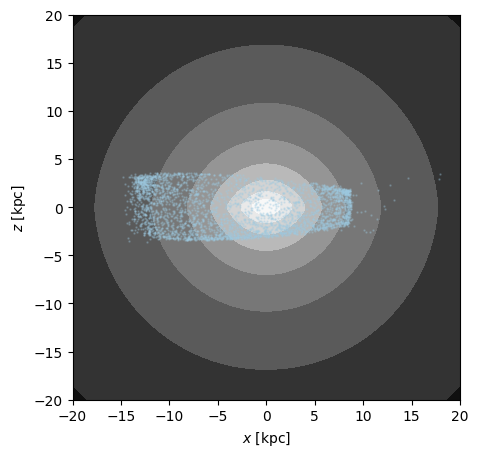

In [381]:
grid = np.linspace(-20,20,64)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
fig = total_potential.plot_contours(grid=(grid, 0, grid), cmap='Greys', ax=ax)
fig = orbits[-1].plot(['x','z'], color='#9ecae1', s=2,  
                      alpha=0.3, axes=[ax], auto_aspect=False)

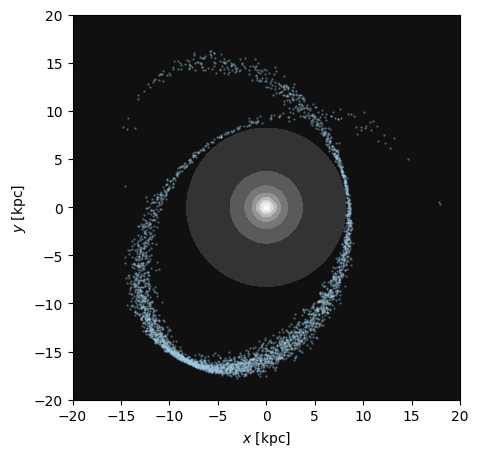

In [382]:
grid = np.linspace(-20,20,64)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
fig = total_potential['bulge'].plot_contours(grid=(grid, grid, 0), cmap='Greys', ax=ax)
fig = orbits[-1].plot(['x','y'], color='#9ecae1', s=1,  
                      alpha=0.5, axes=[ax], auto_aspect=False)

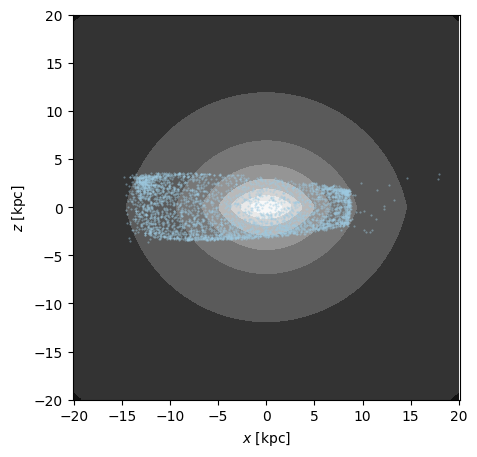

In [383]:
grid = np.linspace(-20,20,64)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
fig = total_potential['disk'].plot_contours(grid=(grid, 0, grid), cmap='Greys', ax=ax)
fig = orbits[-1].plot(['x','z'], color='#9ecae1', s=1,  
                      alpha=0.5, axes=[ax], auto_aspect=True)

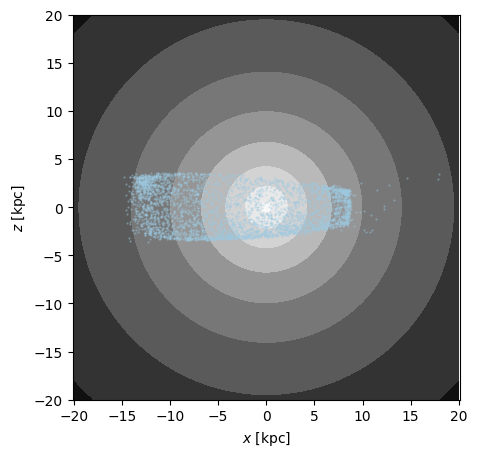

In [384]:
grid = np.linspace(-20,20,64)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
fig = total_potential['dm_halo'].plot_contours(grid=(grid, 0, grid), cmap='Greys', ax=ax)
fig = orbits[-1].plot(['x','z'], color='#9ecae1', s=1,  
                      alpha=0.5, axes=[ax], auto_aspect=True)

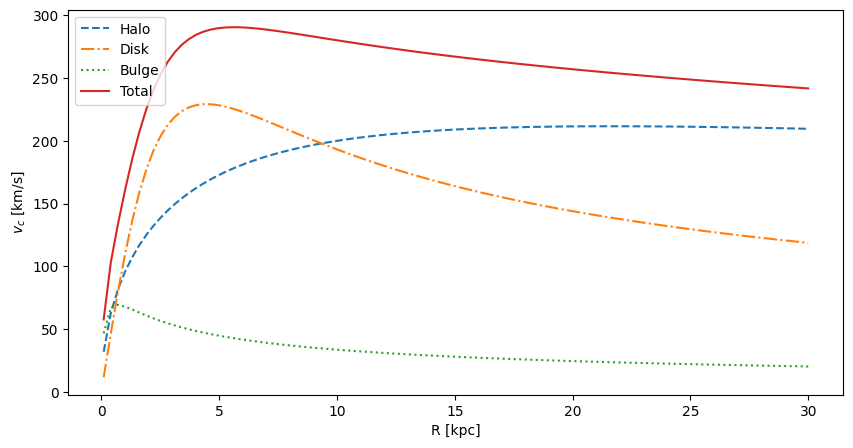

In [385]:
R_grid = np.linspace(0.1, 30, 100) * u.kpc
xyz = np.zeros((3,) + R_grid.shape) * total_potential['dm_halo'].units["length"]
xyz[0] = R_grid

vcirc_halo = total_potential['dm_halo'].circular_velocity(xyz)
vcirc_disk = total_potential['disk'].circular_velocity(xyz)
vcirc_bulge = total_potential['bulge'].circular_velocity(xyz)
#vcirc_core = core.circular_velocity(xyz)
vcirc_gal = total_potential.circular_velocity(xyz)

fig = plt.figure(figsize=(10, 5))
plt.plot(R_grid, vcirc_halo, label='Halo',linestyle='--')
plt.plot(R_grid, vcirc_disk, label='Disk',linestyle='-.')
plt.plot(R_grid, vcirc_bulge, label='Bulge',linestyle=':')
#plt.plot(R_grid, vcirc_core, label='Nucleus',linestyle='-.')
plt.plot(R_grid, vcirc_gal, label='Total')
plt.xlabel('R [kpc]')
plt.ylabel(f'$v_c$ [km/s]')
plt.legend()
plt.show()

In [386]:
#estrellas para probar los potenciales
a_star_p = [8,2,0.5]
a_star_v = [-20,80,-3]

b_star_p = [3,7,0]
b_star_v = [150,-80,-6]


In [387]:
#Dentro del halo de materia oscura
a_particle = gd.PhaseSpacePosition(pos = a_star_p*u.kpc, 
                            vel = a_star_v*u.km/u.s)
b_particle = gd.PhaseSpacePosition(pos = b_star_p*u.kpc, vel= b_star_v*u.km/u.s)

#orbital matematical derivation
a_orbit_DM = gp.Hamiltonian(total_potential['dm_halo']).integrate_orbit(a_particle, dt=2., n_steps=5000)
b_orbit_DM = gp.Hamiltonian(total_potential['dm_halo']).integrate_orbit(b_particle, dt = 2. , n_steps = 5000)

#calculo de parametros practica 2
a_potentialenergy = a_orbit_DM.energy() - a_orbit_DM.kinetic_energy().to(u.kpc**2/u.Myr**2)
a_totalenergy_DM = a_orbit_DM.energy()
a_angularmoment_DM = a_orbit_DM.angular_momentum
a_Lx_DM = a_angularmoment_DM()[0]
a_Ly_DM = a_angularmoment_DM()[1]
a_Lz_DM = a_angularmoment_DM()[2] 
a_totalangularmoment = np.sqrt(a_Lx_DM**2 + a_Ly_DM**2 + a_Lz_DM**2)
a_eccentricity = a_orbit_DM.eccentricity

b_totalenergy_DM = b_orbit_DM.energy() + b_orbit_DM.kinetic_energy()
b_angularmoment_DM = b_orbit_DM.angular_momentum
b_Lx_DM = b_angularmoment_DM()[0]
b_Ly_DM = b_angularmoment_DM()[1]
b_Lz_DM = b_angularmoment_DM()[2] 
b_eccentricity = b_orbit_DM.eccentricity

In [388]:
a_test_orbit = total_potential['dm_halo'].integrate_orbit(a_particle, dt=0.5*u.Myr, t1=0, t2=2*u.Gyr )
b_test_orbit = total_potential['dm_halo'].integrate_orbit(b_particle, dt=0.5*u.Myr, t1=0, t2=2*u.Gyr )

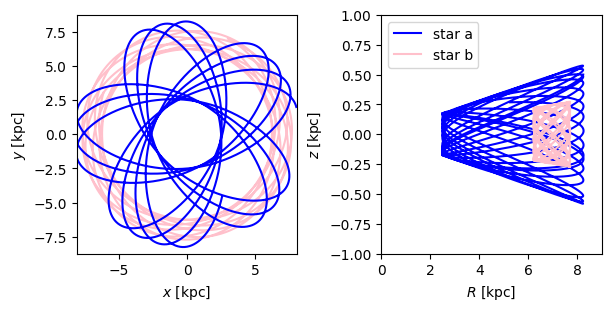

In [389]:
fig, axes = plt.subplots(1,2,figsize=(6, 3), constrained_layout = True)

b_test_orbit.plot(['x','y'], color='pink', axes=axes[0])
a_test_orbit.plot(['x','y'], color='blue', axes=axes[0])
axes[0].set_xlim(-8,8)
axes[0].set_ylim(-8,8)

a_test_orbit.cylindrical.plot(
    ["rho", "z"],
    color='blue',
    axes=axes[1],
    auto_aspect=False,
    labels=["$R$ [kpc]", "$z$ [kpc]"],
    label="star a",
)
b_test_orbit.cylindrical.plot(
    ["rho", "z"],
    color='pink',
    axes=axes[1],
    auto_aspect=False,
    labels=["$R$ [kpc]", "$z$ [kpc]"],
    label="star b",
)
axes[1].set_xlim(0,9)
axes[1].set_ylim(-1,1)
axes[1].set_aspect('auto')
axes[1].legend(loc='best', fontsize=10)


MovieWriter ffmpeg unavailable; using Pillow instead.


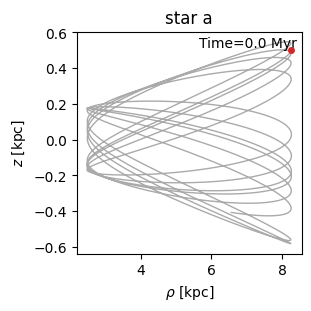

In [396]:
#Esto hace los gif de las orbitas
fig, axes = plt.subplots(1,1,figsize=(3, 3), constrained_layout = True)
fig, anim = a_test_orbit[:3000].cylindrical.animate(components=['rho', 'z'], stride=10, axes=axes)
axes.set_title('star a')
anim.save('animaciona.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


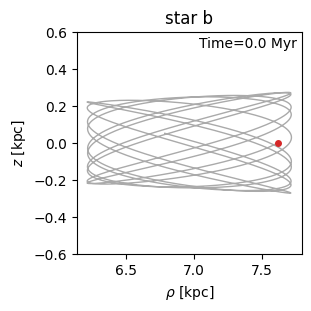

In [397]:
#Esto hace gis de orbita
fig, axes = plt.subplots(1,1,figsize=(3, 3), constrained_layout = True)
fig, anim = b_test_orbit[:3000].cylindrical.animate(components=['rho', 'z'], stride=10, axes=axes)
#axes.legend(loc='best', fontsize=15)
axes.set_title('star b')
axes.set_ylim(-0.6,0.6)

anim.save('animacionb.gif')

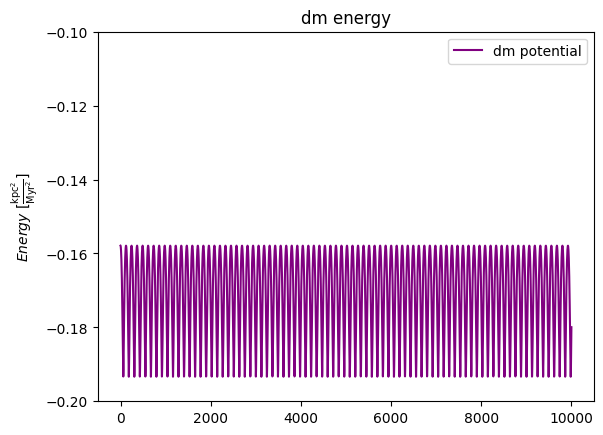

In [398]:
#calcular y graficar la evolucion temporal de energia

#plt.plot(a_orbit_DM.t, a_totalenergy_DM, label='total energy')
plt.plot(a_orbit_DM.t, a_potentialenergy, color='purple', label='dm potential')
plt.ylim(-0.2,-0.1)
#plt.yscale('log') 
plt.ylabel("$Energy$ [{}]".format(a_totalenergy_DM.unit.to_string(format='latex'))) 
plt.title('dm energy')
plt.legend(loc='best')


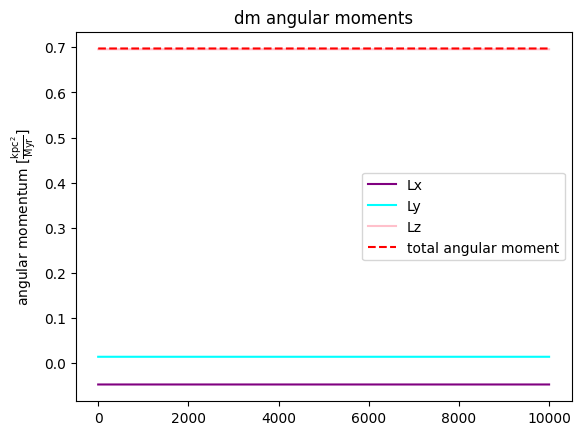

In [399]:
#calcular y graficar la evolucion temporal de energia

#plt.plot(a_orbit_DM.t, a_totalenergy_DM, label='total energy')
plt.plot(a_orbit_DM.t, a_Lx_DM, color='purple', label='Lx')
plt.plot(a_orbit_DM.t, a_Ly_DM, color='cyan', label='Ly')
plt.plot(a_orbit_DM.t, a_Lz_DM, color='pink', label='Lz')
plt.plot(a_orbit_DM.t, a_totalangularmoment, color='red', label='total angular moment', linestyle='--')

#plt.ylim(-0.2,-0.1)
#plt.yscale('log') 
plt.ylabel("angular momentum [{}]".format(a_Lx_DM.unit.to_string(format='latex'))) 
plt.title('dm angular moments')
plt.legend(loc='best')

In [404]:
#agregamos el disco y otras cosas
#orbital matematical derivation
a_orbit_total = gp.Hamiltonian(total_potential).integrate_orbit(a_particle, dt=2., n_steps=5000)
b_orbit_total = gp.Hamiltonian(total_potential).integrate_orbit(b_particle, dt = 2. , n_steps = 5000)

#calculo de parametros practica 2
a_potentialenergy_total = a_orbit_total.energy() - a_orbit_total.kinetic_energy().to(u.kpc**2/u.Myr**2)
a_totalenergy_total = a_orbit_total.energy()
a_angularmoment_total = a_orbit_total.angular_momentum
a_Lx_total = a_angularmoment_total()[0]
a_Ly_total = a_angularmoment_total()[1]
a_Lz_total = a_angularmoment_total()[2] 
a_totalangularmoment_total = np.sqrt(a_Lx_DM**2 + a_Ly_DM**2 + a_Lz_DM**2)
a_eccentricity_total = a_orbit_total.eccentricity

b_totalenergy_total = b_orbit_total.energy() + b_orbit_total.kinetic_energy()
b_angularmoment_total = b_orbit_total.angular_momentum
b_Lx_total = b_angularmoment_total()[0]
b_Ly_total = b_angularmoment_total()[1]
b_Lz_total = b_angularmoment_total()[2] 
b_eccentricity_total = b_orbit_total.eccentricity

In [501]:
# ninguna de las orbitas srive, asi que hacemos una tercera

c_star_p = [5,0,0]
c_star_v = [155,0,0]

ics = gd.PhaseSpacePosition(pos = c_star_p*u.kpc, 
                            vel = c_star_v*u.km/u.s)
#orbital matematical derivation
c_orbit_total = gp.Hamiltonian(total_potential).integrate_orbit(ics,dt=2.,n_steps=5000)

c_potentialenergy = c_orbit_total.energy() - c_orbit_total.kinetic_energy().to(u.kpc**2/u.Myr**2)
c_totalenergy_total = c_orbit_total.energy()
c_angularmoment_total = c_orbit_total.angular_momentum
c_Lx_total = c_angularmoment_total()[0]
c_Ly_total = c_angularmoment_total()[1]
c_Lz_total = c_angularmoment_total()[2] 
c_totalangularmoment = np.sqrt(c_Lx_total**2 + c_Ly_total**2 + c_Lz_total**2)
c_eccentricity = c_orbit_total.eccentricity


poncaire_c1 = c_orbit_total[np.nonzero(c_orbit_total.pos.y > 0)]



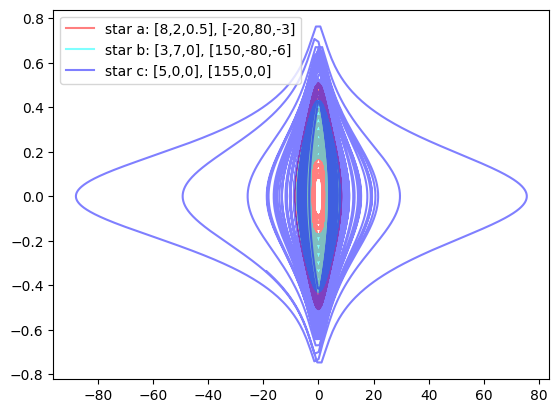

In [510]:
#graficos para distintas estrellas creadas con posiciones iniciales disntintas
plt.plot(a_orbit_total.pos.x, a_orbit_total.vel.d_x, color='red', alpha=0.5, label='star a: [8,2,0.5], [-20,80,-3]')
plt.plot(b_orbit_total.pos.x, b_orbit_total.vel.d_x, color='cyan', alpha=0.5, label='star b: [3,7,0], [150,-80,-6]')
plt.plot(c_orbit_total.pos.x, c_orbit_total.vel.d_x, color = 'blue', alpha=0.5, label='star c: [5,0,0], [155,0,0]')

plt.legend()


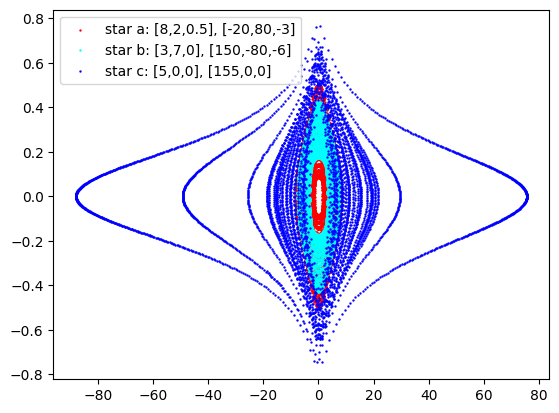

In [513]:
#graficos para distintas estrellas creadas con posiciones iniciales disntintas
plt.scatter(a_orbit_total.pos.x, a_orbit_total.vel.d_x, color='red', s=0.5, label='star a: [8,2,0.5], [-20,80,-3]')
plt.scatter(b_orbit_total.pos.x, b_orbit_total.vel.d_x, color='cyan', s=0.5, label='star b: [3,7,0], [150,-80,-6]')
plt.scatter(c_orbit_total.pos.x, c_orbit_total.vel.d_x, color = 'blue', s=0.5, label='star c: [5,0,0], [155,0,0]')

plt.legend()